<a href="https://www.kaggle.com/code/umez63/black-friday-umez?scriptVersionId=142103927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df=pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")
df["Product_Category_2"].fillna(round(df["Product_Category_2"].mean(),2),inplace=True)
df["Product_Category_3"].fillna(round(df["Product_Category_3"].mean(),2),inplace=True)


In [3]:
df.loc[0,"Age"]

'0-17'

filling Na values

<Axes: xlabel='Gender', ylabel='Purchase'>

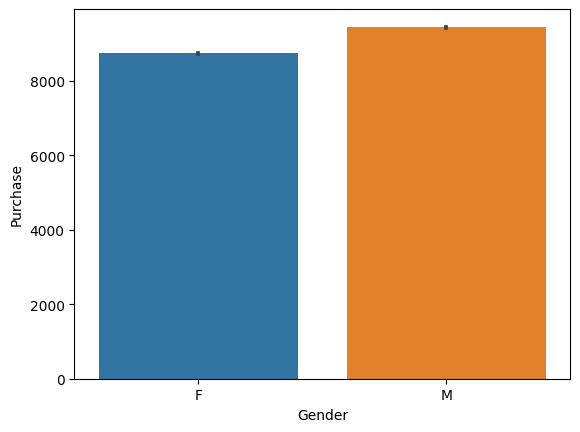

In [4]:
sns.barplot(x="Gender",y="Purchase",data=df)

Purchase made by male and female

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

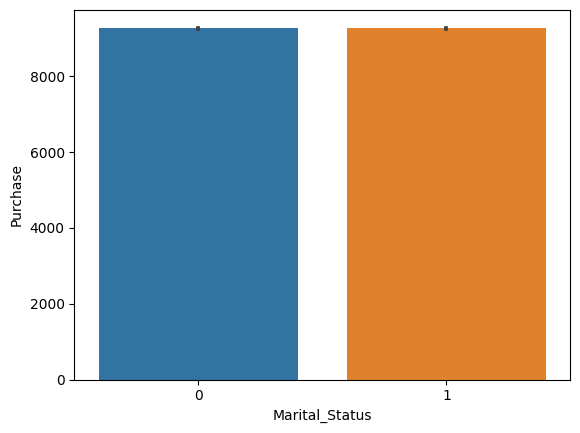

In [5]:
sns.barplot(x="Marital_Status",y="Purchase",data=df)


Marital status of custumer

<Axes: xlabel='Occupation', ylabel='Purchase'>

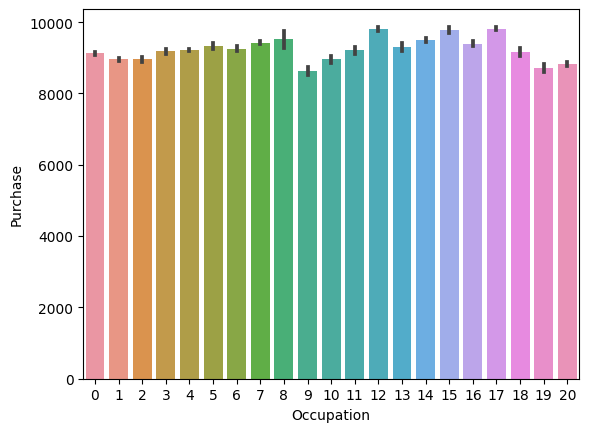

In [6]:
sns.barplot(x="Occupation",y="Purchase",data=df)

<Axes: xlabel='City_Category'>

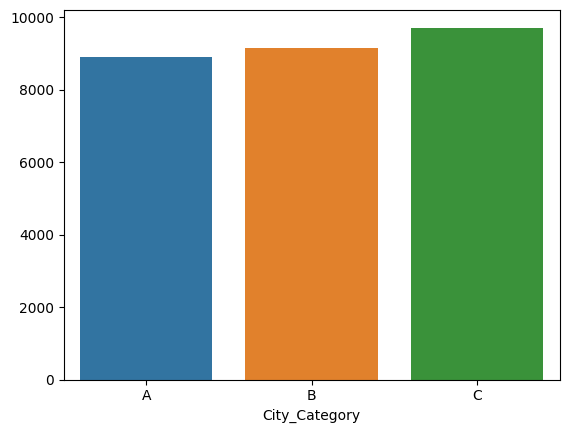

In [7]:
city_purchase=df.groupby("City_Category")["Purchase"].mean()
sns.barplot(x=city_purchase.index,y=city_purchase.values)

<Axes: xlabel='Age'>

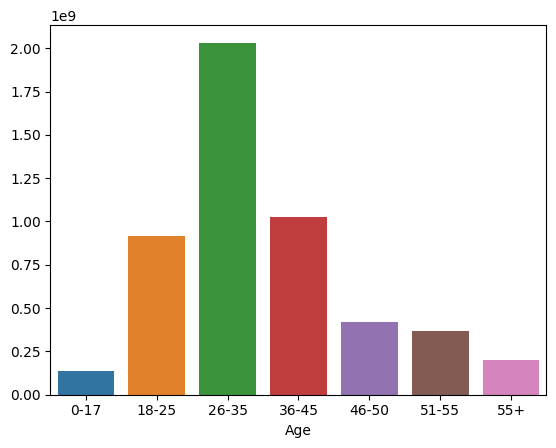

In [8]:
age_group=df.groupby("Age")["Purchase"].sum()
sns.barplot(x=age_group.index,y=age_group.values)

purchase made by age group

In [9]:
df["Gender"]=df["Gender"].apply(lambda x: 0 if x=="F"  else 1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.84,12.67,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.00,14.00,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.84,12.67,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.00,12.67,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,9.84,12.67,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,B,1,1,20,9.84,12.67,368
550064,1006035,P00375436,0,26-35,1,C,3,0,20,9.84,12.67,371
550065,1006036,P00375436,0,26-35,15,B,4+,1,20,9.84,12.67,137
550066,1006038,P00375436,0,55+,1,C,2,0,20,9.84,12.67,365


coverting gender columns to interger 1 is for male and 0 is for female

purchase made by user_ID

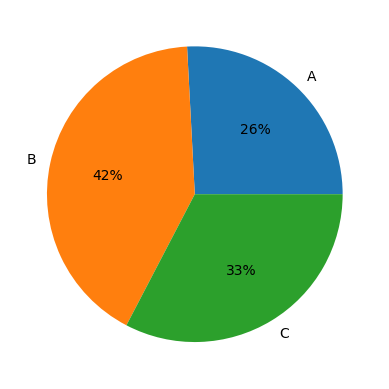

In [10]:
pie_chart=df.groupby("City_Category")["Purchase"].sum()
plt.pie(x=pie_chart.values,labels=pie_chart.index,autopct='%.0f%%')
plt.show()


most_sell_in_city("B")

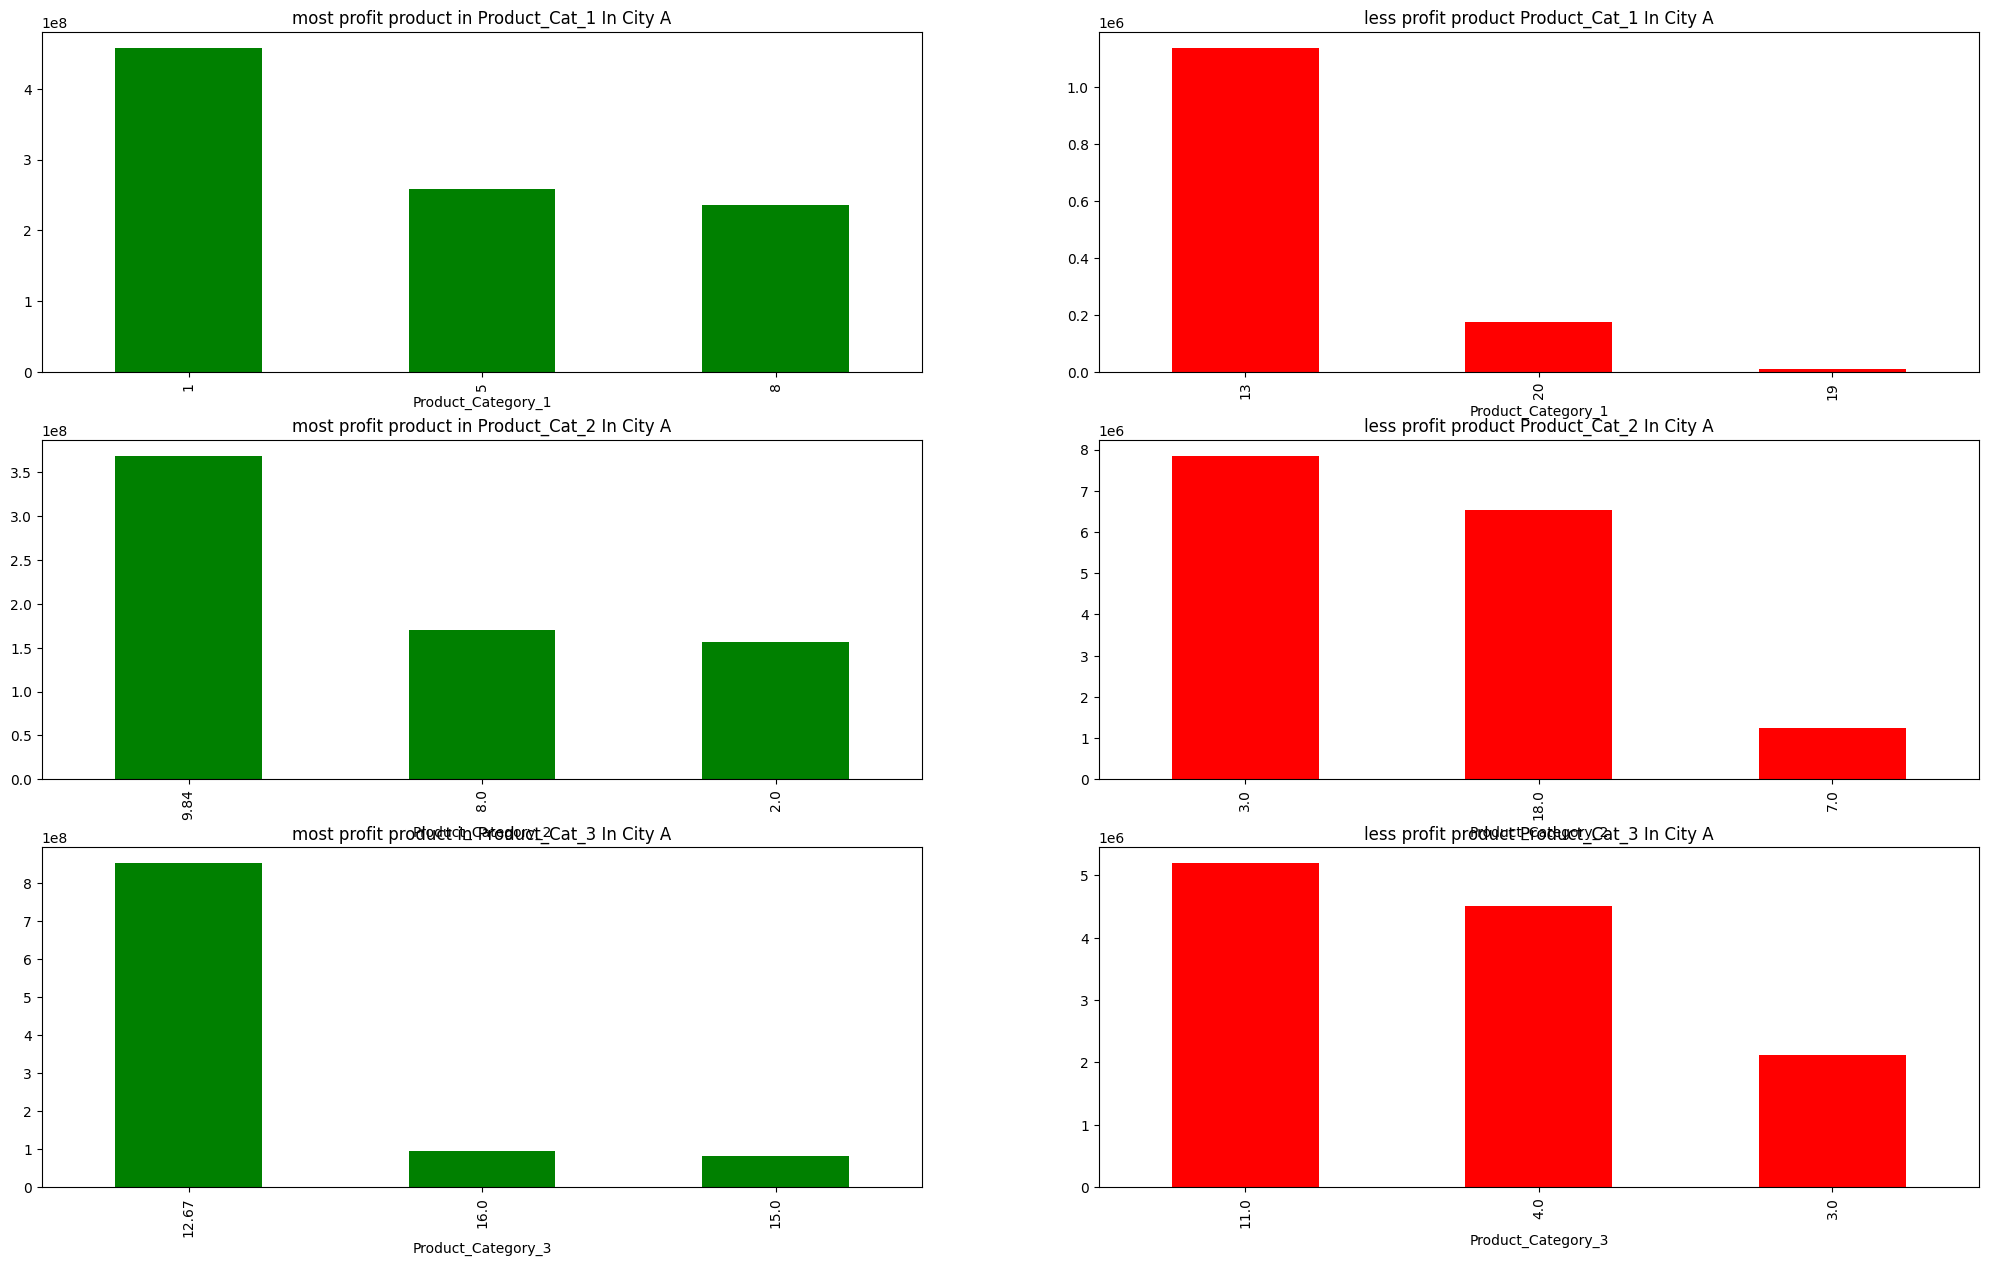

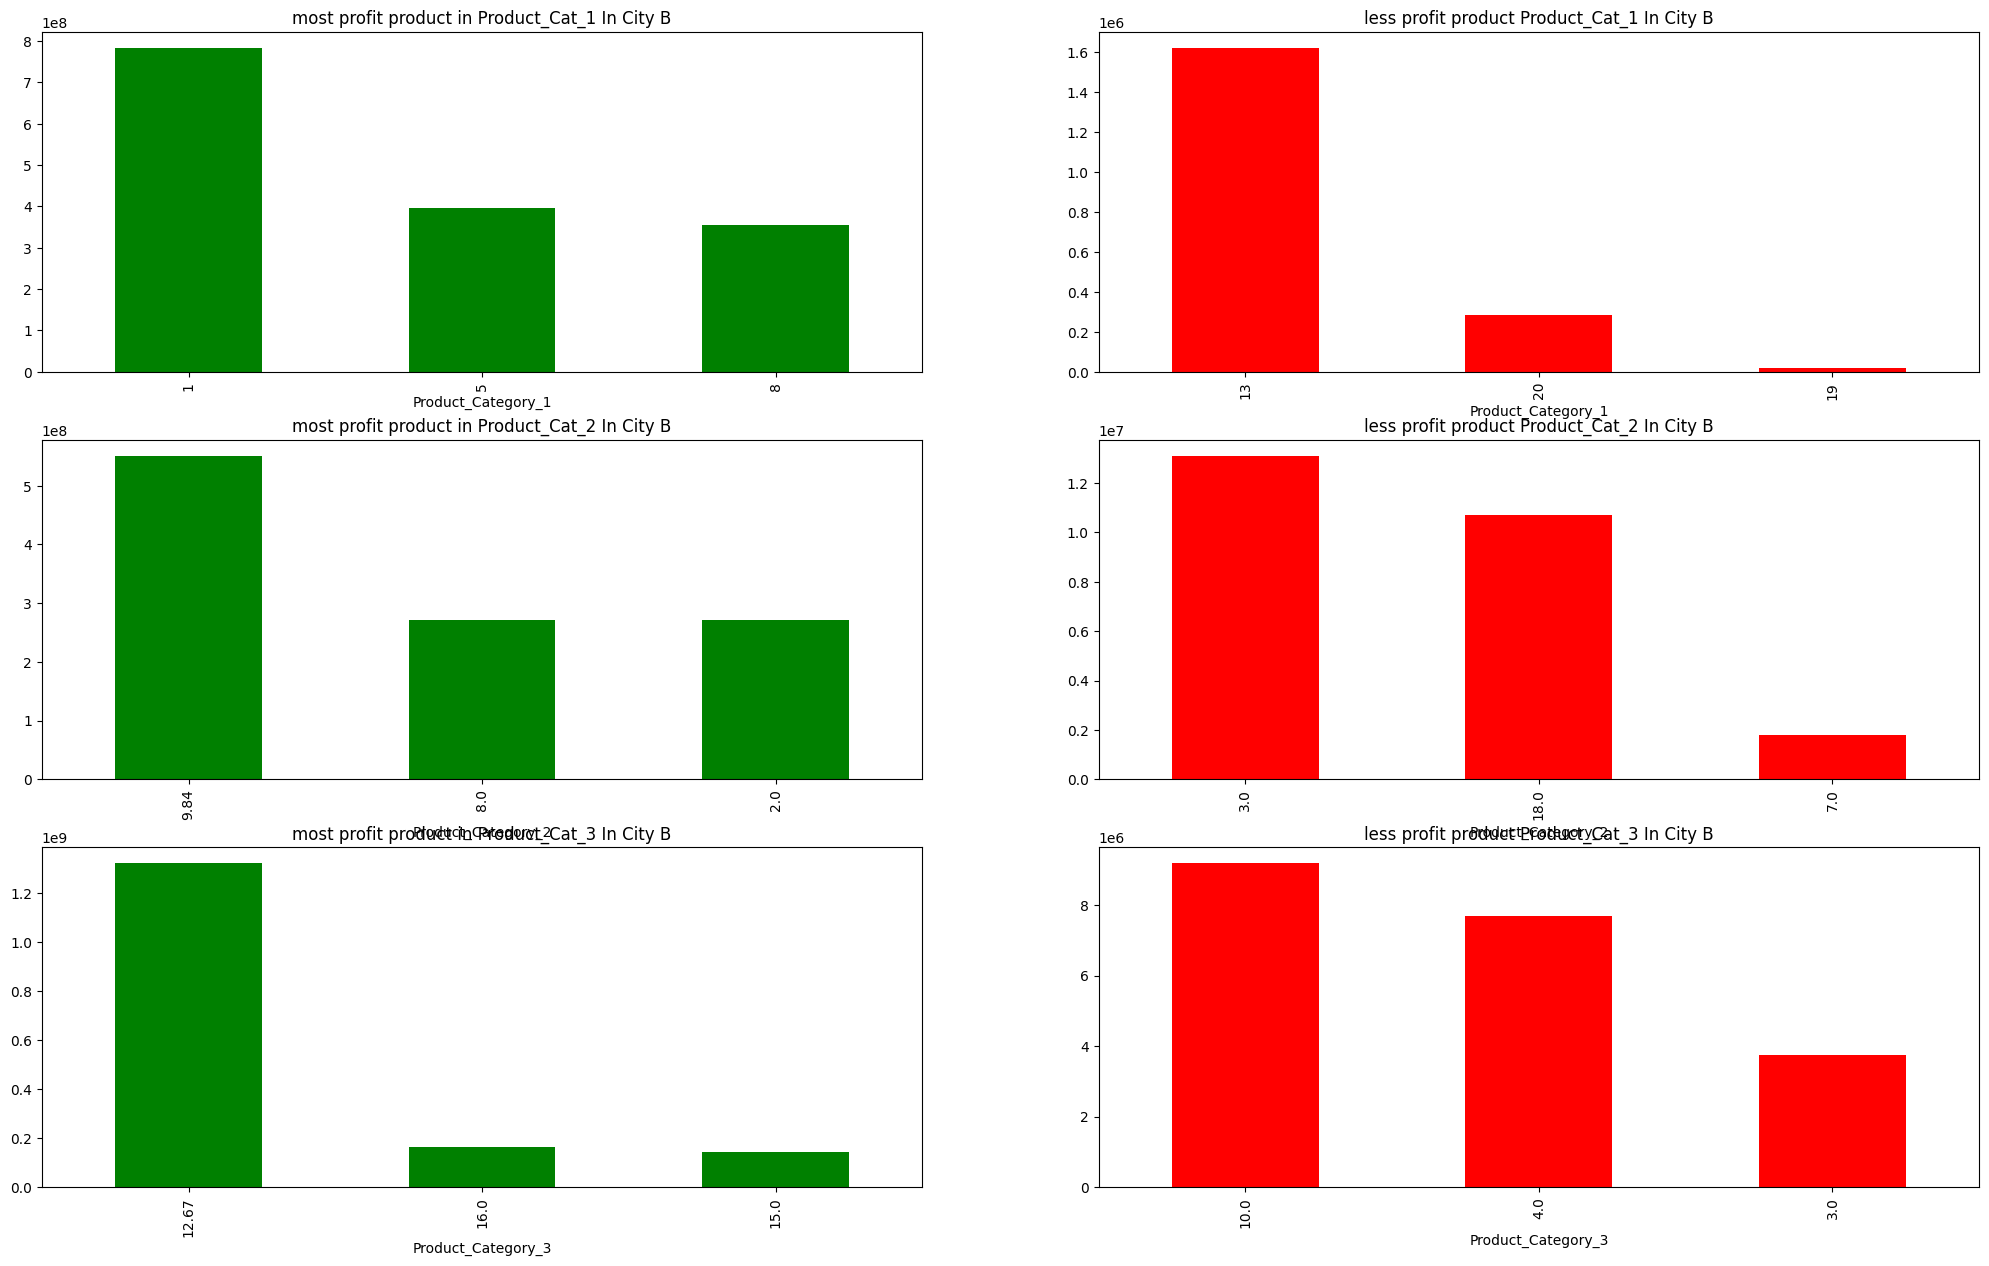

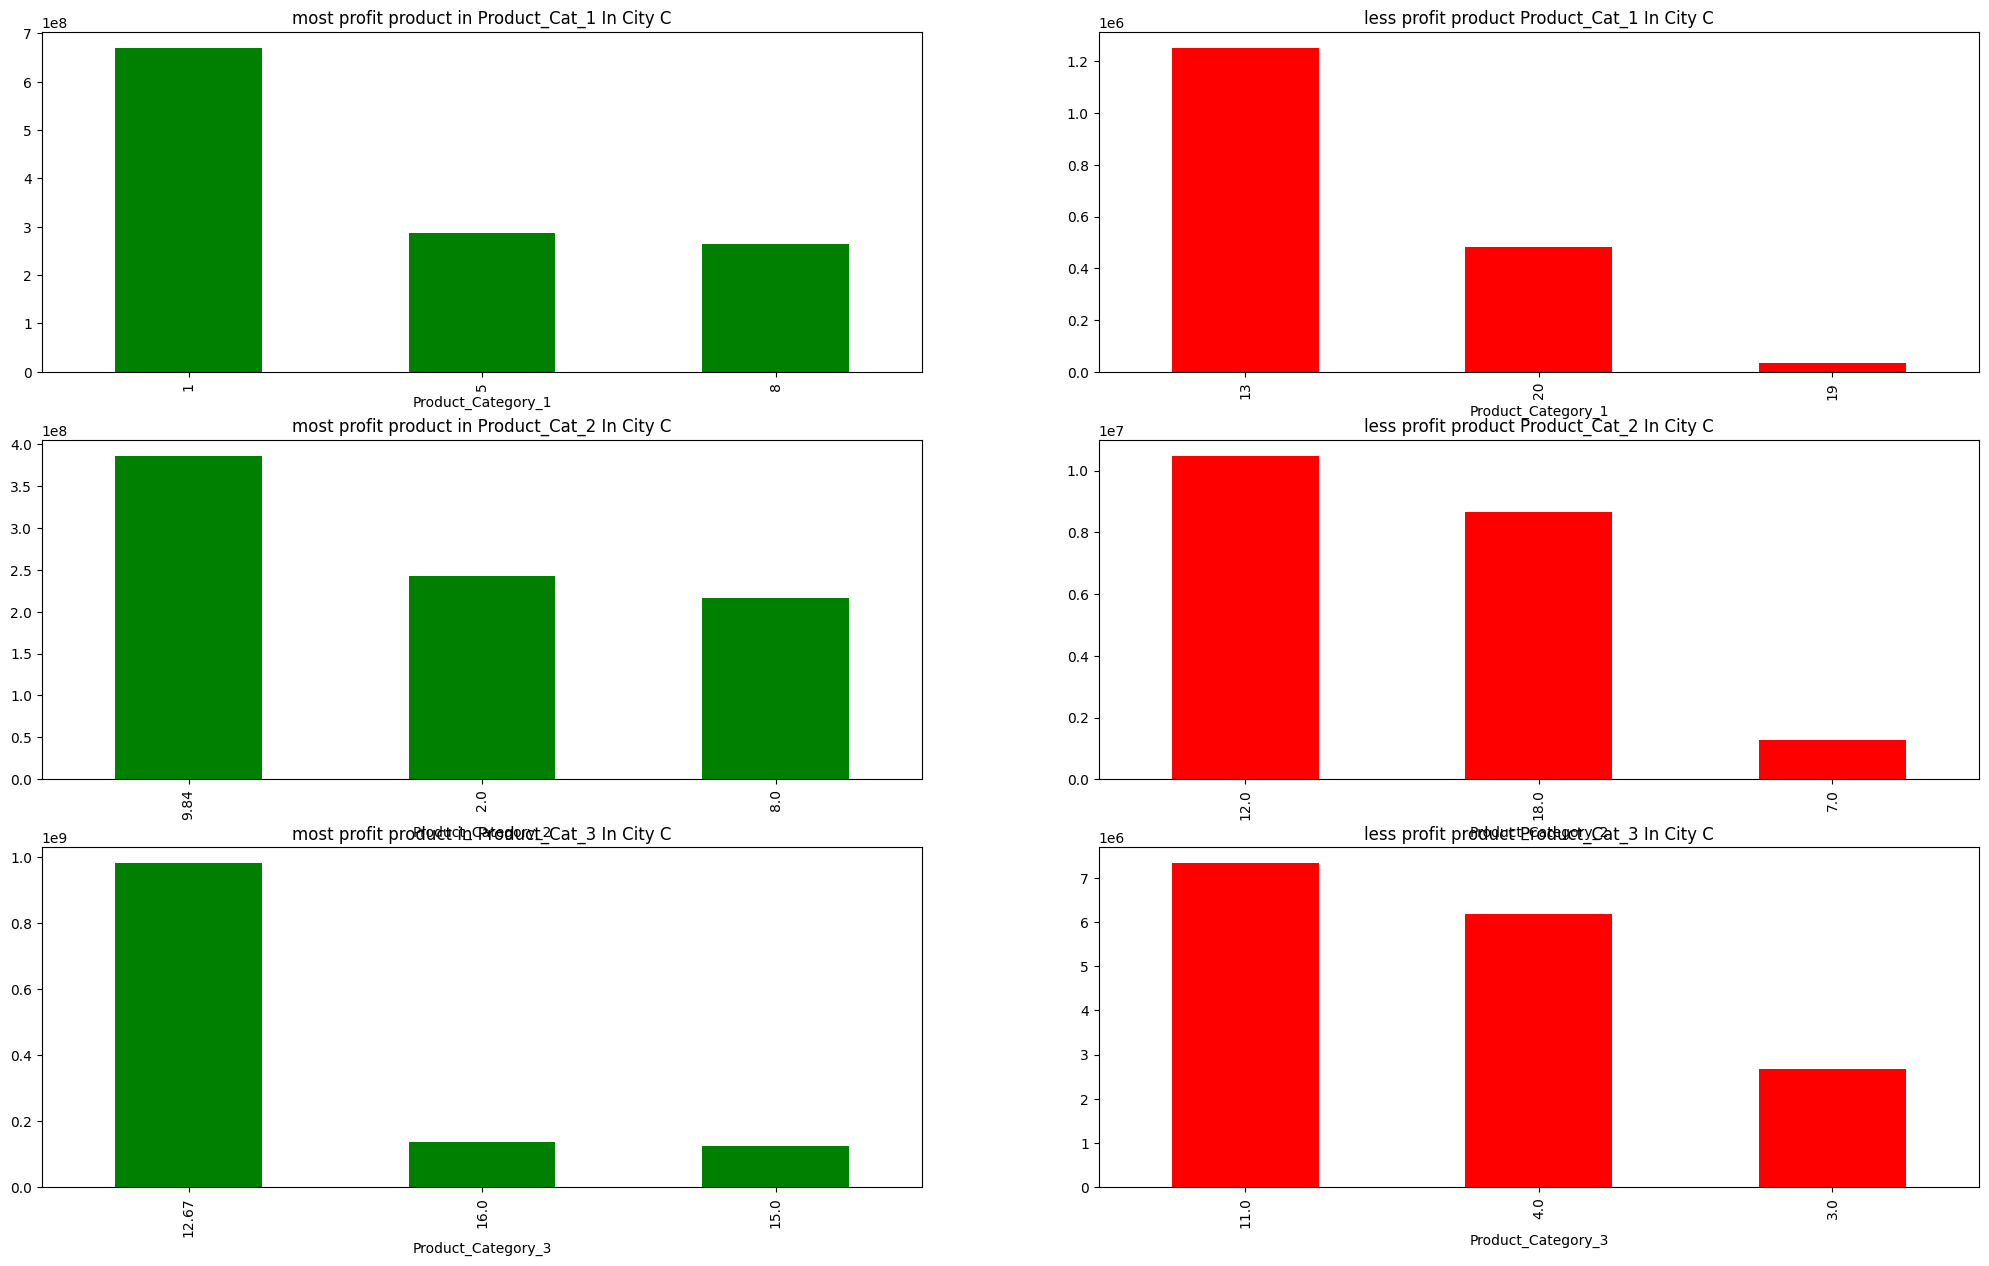

In [11]:
def most_sell_in_city(city_name):
    df1=df[df["City_Category"]==city_name]
    
    
    
    fig, ax = plt.subplots(3,2,figsize=(25, 15))
    for i in range(0,3):
        cat0=df1.groupby(f"Product_Category_{i+1}")["Purchase"].sum().nlargest(3)
        p1=cat0.sort_values(ascending=False).plot.bar(x=cat0.index,y=cat0.values,ax=ax[(i,0)],title=f"most profit product in Product_Cat_{i+1} In City {city_name}",color="green")
        cat1=df1.groupby(f"Product_Category_{i+1}")["Purchase"].sum().nsmallest(3)
        p1=cat1.sort_values(ascending=False).plot.bar(x=cat1.index,y=cat1.values,ax=ax[(i,1)],title=f"less profit product Product_Cat_{i+1} In City {city_name}",color="red")
    

most_sell_in_city("A")
most_sell_in_city("B")
most_sell_in_city("C")

Most sell and least sell in all city

##### 

In [12]:
def gender_age():
    #     fig, ax = plt.subplots(1,2,figsize=(16,5))
    male=df[df["Gender"]==1]
    female=df[df["Gender"]==0]
    male_age=male.groupby("Age")["Purchase"].sum()
    female_age=female.groupby("Age")["Purchase"].sum()

    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "domain"},{"type": "domain"}]],
    )

    fig.add_trace(go.Pie(values=male_age.values, labels = male_age.index,title = 'MALE AGE GROUP'),
                  row=1, col=1)

    fig.add_trace(go.Pie(values=female_age.values, labels = female_age.index, title = 'FEMALE AGE GROUP'),
                  row=1, col=2)

    fig.update_layout(height=700, showlegend=True)

    fig.show()

gender_age()

purchase made by male and female

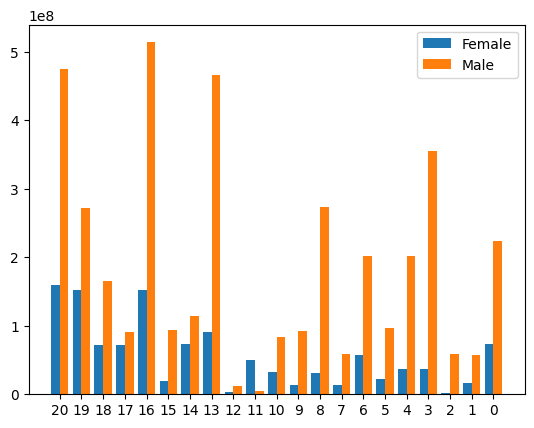

In [13]:

#df1=df[df["City_Category"]=="C"]
Age_group = df.groupby("Occupation")["Purchase"].sum().index.sort_values(ascending=False)
female = df[df["Gender"]==0].groupby("Occupation")["Purchase"].sum()
male = df[df["Gender"]==1].groupby("Occupation")["Purchase"].sum()
x_axis = np.arange(len(Age_group))

# Multi bar Chart

plt.bar(x_axis -0.2, female.values, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, male.values, width=0.4, label = 'Male')

# Xticks

plt.xticks(x_axis, Age_group)

# Add legend

plt.legend()

custumer occupation and gender of custumer #can not get by city because ther are some occupation missing in citys
occupation and there gender

In [14]:
df
col1=["Product_Category_1","Product_Category_2","Product_Category_3"]
new_df=pd.DataFrame(col1)
# new_df["Populat"]
new_df

,0
0,Product_Category_1
1,Product_Category_2
2,Product_Category_3
